In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
virtus_ai = pd.read_csv('Virtus_AI_weekly.csv')
stk = pd.read_csv('STK_weekly.csv')
nasdaq = pd.read_csv('NASDAQ_QQQX_weekly.csv')
bst = pd.read_csv('BST_weekly.csv')
bstz = pd.read_csv('BSTZ_weekly.csv')

In [3]:
bstz.columns = ['Date', 'Share Price', 'NAV', 'Discount']
virtus_ai.columns = ['Date', 'Share Price', 'NAV', 'Discount']
stk.columns = ['Date', 'Share Price', 'NAV', 'Discount'] 
nasdaq.columns = ['Date', 'Share Price', 'NAV', 'Discount'] 
bst.columns = ['Date', 'Share Price', 'NAV', 'Discount'] 

C:\Users\tural\AppData\Local\Temp\ipykernel_13668\1037273342.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\tural\AppData\Local\Temp\ipykernel_13668\1037273342.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\tural\AppData\Local\Temp\ipykernel_13668\1037273342.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\tural\AppData\Local\Temp\ipykernel_13668\1037273342.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or spec

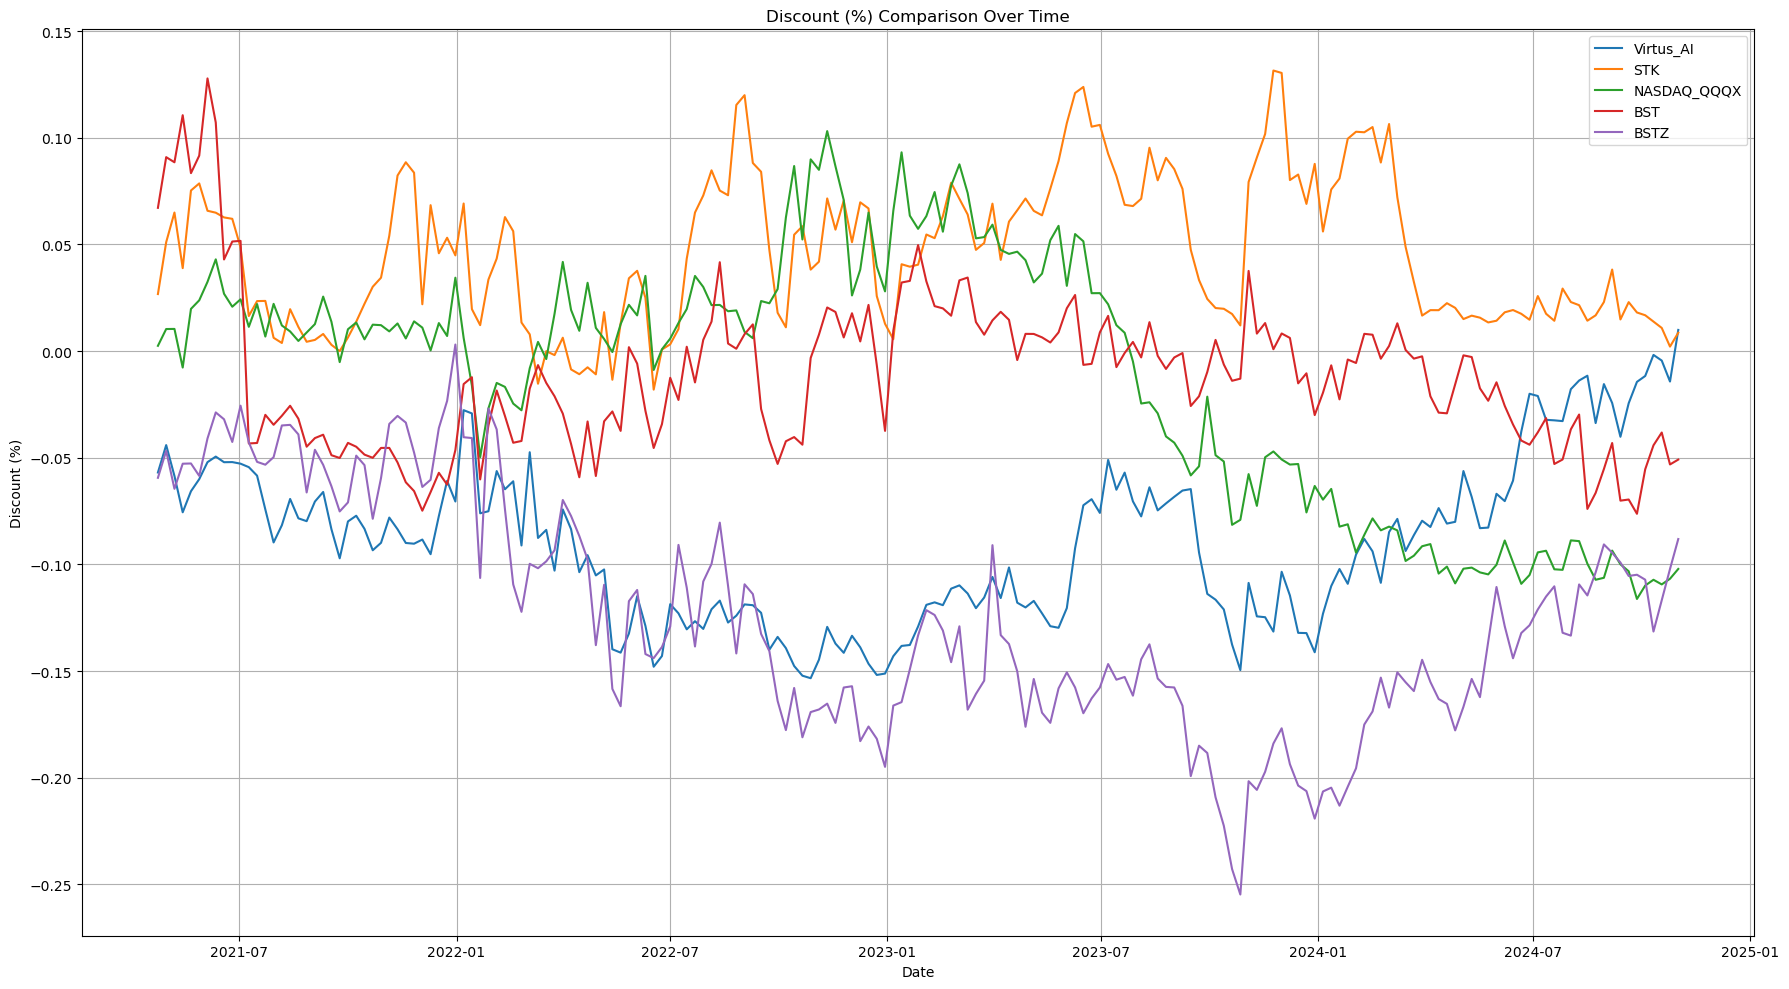

In [4]:
for df in [virtus_ai, stk, nasdaq, bst, bstz]:
    df['Date'] = pd.to_datetime(df['Date'])

# Plot the Discount (%) for each dataset
plt.figure(figsize=(18, 10))
plt.plot(virtus_ai['Date'], virtus_ai['Discount'], label='Virtus_AI')
plt.plot(stk['Date'], stk['Discount'], label='STK')
plt.plot(nasdaq['Date'], nasdaq['Discount'], label='NASDAQ_QQQX')
plt.plot(bst['Date'], bst['Discount'], label='BST')
plt.plot(bstz['Date'], bstz['Discount'], label='BSTZ')
plt.xlabel('Date')
plt.ylabel('Discount (%)')
plt.title('Discount (%) Comparison Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [6]:
virtus_ai_TCA = 786_954_000
stk_TCA = 577_985_000
nasdaq_TCA = 1_426_230_000
bst_TCA = 1_362_414_000
bstz_TCA = 1_696_243_000

total_TCA = virtus_ai_TCA + nasdaq_TCA + bst_TCA + bstz_TCA + stk_TCA

w_virtus_ai = virtus_ai_TCA/total_TCA
w_stk = stk_TCA/total_TCA
w_nasdaq = nasdaq_TCA/total_TCA
w_bst = bst_TCA/total_TCA
w_bstz = bstz_TCA/total_TCA

cefd_weighted = pd.DataFrame(data = (
    w_virtus_ai * virtus_ai['Discount'] +
    w_nasdaq * nasdaq['Discount'] +
    w_bst * bst['Discount'] +
    w_bstz * bstz['Discount'] + 
    w_stk * stk['Discount'])
)

cefd_weighted['Date'] = pd.to_datetime(virtus_ai['Date'])

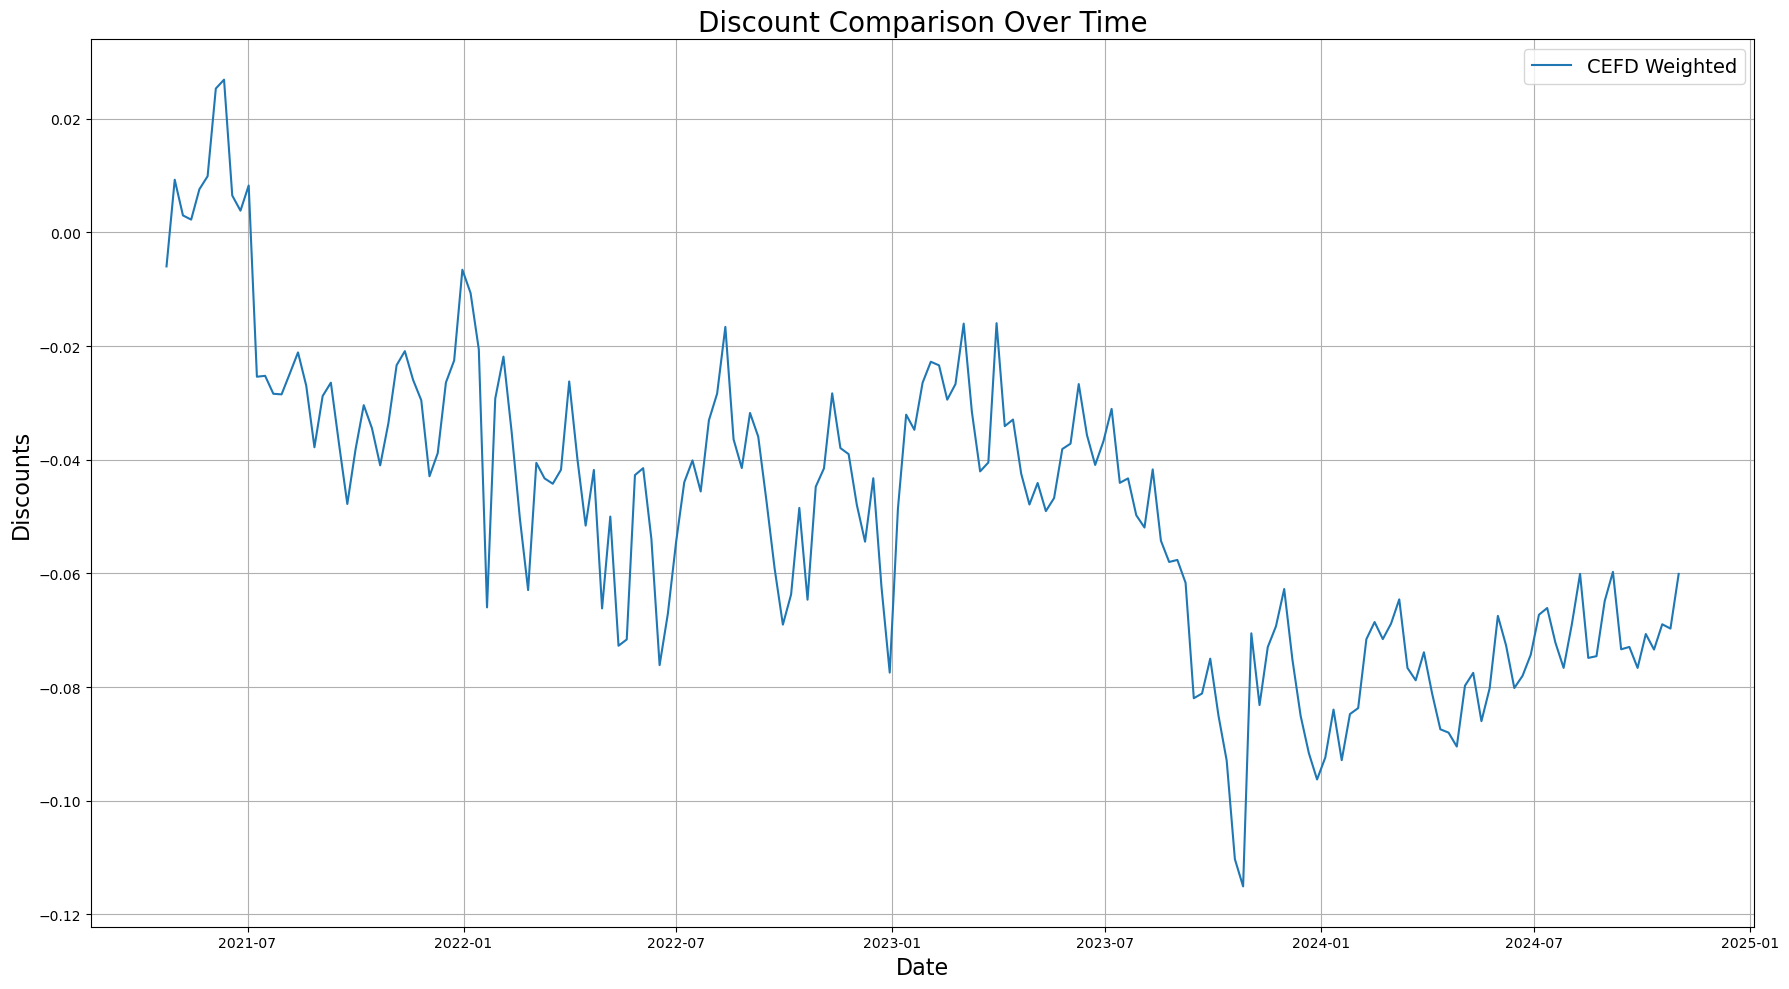

In [8]:
plt.figure(figsize=(18, 10))
plt.plot(cefd_weighted['Date'], cefd_weighted['Discount'], label='CEFD Weighted')

# Increase font size for axis labels, title, and legend
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discounts', fontsize=16)
plt.title('Discount Comparison Over Time', fontsize=20)
plt.legend(fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()